<a href="https://colab.research.google.com/github/AlexandreOpencClassrooms/cours/blob/main/fr/realisez-des-modelisations-de-donnees-performantes/partie-2/Copie_de_TP_page_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Déterminez la hauteur d'un arbre à l'aide d'une régression</h1>

# 1. Introduction

## 1.1 Context

Ceci est le corrigé du TP [Entraînez-vous : déterminez la hauteur d'un arbre à l'aide d'une régression](https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/6733326-entrainez-vous-determinez-la-hauteur-dun-arbre-a-laide-dune-regression)

Les données peuvent être trouvées ici : [lien ](https://opendata.paris.fr/explore/dataset/les-arbres/table/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable)

* version 0.0.1
* last update 2022-08-02
* Author Alexandre Gazagnes

## 1.2 Imports

Nous allons d'abord commencer par importer les librairies.

In [536]:
import os
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

## 1.3 Graphics & options

Nous allons ensuite charger les options graphiques.

In [537]:
sns.set()

warnings.filterwarnings('ignore')

## 1.4 Data

Passons maintenant aux données. Le module `os` nous permet de faire la liste des fichiers de notre répertoire de travail.

In [538]:
os.listdir()

['.config', 'les-arbres.csv', 'sample_data']

Nous avons choisi de mettre le fichier `.csv` à la racine de notre projet ou dans un repertoire `data/source`.

In [539]:
# path     = "data/source/" ou :
path     = "./"
filename = "les-arbres.csv"

Cela se confirme si l'on tape la commande `os.listdir` sur la variable `path`.


In [540]:
os.listdir(path)

['.config', 'les-arbres.csv', 'sample_data']

Chargeons notre dataframe.

In [541]:
df = pd.read_csv(path+filename, sep=";")
df.head(2)

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,157,NaN,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,NaN,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,''Nova'',55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"


**ATTENTION** à bien utiliser l'argument `sep-;` dans la méthode `read_csv`!

Tout semble OK.

## 1.4 Renaming columns

Juste pour des raisons de confort, renommons nos colonnes.

In [542]:
cols = df.columns
cols

Index(['IDBASE', 'TYPE EMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENT ADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLE FRANCAIS', 'GENRE', 'ESPECE', 'VARIETE OUCULTIVAR',
       'CIRCONFERENCE (cm)', 'HAUTEUR (m)', 'STADE DE DEVELOPPEMENT',
       'REMARQUABLE', 'geo_point_2d'],
      dtype='object')

In [543]:
cols = [i.lower() for i in cols]
cols = [i.split(" ")[0].strip() for i in cols]
cols

['idbase',
 'type',
 'domanialite',
 'arrondissement',
 'complement',
 'numero',
 'lieu',
 'idemplacement',
 'libelle',
 'genre',
 'espece',
 'variete',
 'circonference',
 'hauteur',
 'stade',
 'remarquable',
 'geo_point_2d']

In [544]:
df.columns = cols
df.head(2)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,157,NaN,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,NaN,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,''Nova'',55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"


# 2. First Tour

Avant de se jetter dans le bain, commencons par un rapide tour des données.

## 2.1 Display

Nous allons commencer par afficher les 5 premières lignes, les 5 dernières, et 10 lignes au hasard.

In [545]:
df.head(5)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,157,NaN,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,NaN,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,''Nova'',55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"
2,234757,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,BOULEVARD RASPAIL,004103035,Tilleul,Tilia,x flavescens,''Glenleven'',80,10,Jeune (arbre)Adulte,NON,"48.835943243901234,2.332049269477685"
3,245018,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,BOULEVARD LANNES,000701008,Platane,Platanus,x hispanica,NaN,180,15,Adulte,NON,"48.86388335089906,2.269408781698171"
4,107049,Arbre,Jardin,PARIS 7E ARRDT,Canton 04,NaN,JARDIN DU CHAMP DE MARS ET PELOUSES DE L ECOLE...,A00401020,Tilleul,Tilia,n. sp.,NaN,128,15,Adulte,NON,"48.85601688564015,2.29573613169062"


In [546]:
df.sample(10)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
168268,2021882,Arbre,Alignement,PARIS 18E ARRDT,100,NaN,RUE DU RUISSEAU,001202001,Magnolia,Magnolia,kobus,NaN,60,7,Jeune (arbre)Adulte,NON,"48.896544433232194,2.341951773568296"
102032,218049,Arbre,Alignement,PARIS 15E ARRDT,86,NaN,AVENUE DE BRETEUIL,000504023,Platane,Platanus,occidentalis,NaN,75,10,Adulte,NON,"48.84580905218289,2.311137667496736"
31470,236594,Arbre,Alignement,PARIS 15E ARRDT,146,NaN,BOULEVARD DE GRENELLE,000702006,Cornouiller,Cornus,mas,NaN,20,5,Jeune (arbre),NON,"48.84858092276866,2.299236131622071"
53034,281054,Arbre,Alignement,PARIS 8E ARRDT,NaN,NaN,AVENUE GABRIEL,000103019,Marronnier,Aesculus,hippocastanum,NaN,171,18,Adulte,NON,"48.867473920423606,2.318917572183122"
179776,2028759,Arbre,Alignement,PARIS 20E ARRDT,59,NaN,JARDINIERES DE LA RUE PAUL MEURICE / RUE PAUL ...,000503021,Magnolia,Magnolia,x soulangeana,NaN,25,3,Jeune (arbre),NON,"48.876801126423274,2.410333315731688"
144082,184461,Arbre,DASCO,PARIS 15E ARRDT,NaN,NaN,ECOLE ELEMENTAIRE / 27 RUE OLIVIER DE SERRES,09901006,Marronnier,Aesculus,hippocastanum,NaN,130,12,Adulte,NON,"48.83595946203892,2.297422174896969"
153687,190655,Arbre,DASCO,PARIS 19E ARRDT,NaN,NaN,ROMAINVILLE (59) ELEM B,11640002,Marronnier,Aesculus,hippocastanum,NaN,135,12,Adulte,NON,"48.87766409878853,2.403183626310342"
20531,146246,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE DU FORT / DIV 0,A09600000111,Erable,Acer,pseudoplatanus,NaN,0,0,NaN,NaN,"48.804725442671256,2.3120487943523242"
175725,154601,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / DIV 55,D00000055002,Cornouiller,Cornus,mas,NaN,80,5,Jeune (arbre)Adulte,NON,"48.90479699099193,2.407925509269804"
130077,229662,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,BOULEVARD VINCENT AURIOL,000702003,Chêne,Quercus,robur,''Fastigiata'',70,10,Jeune (arbre)Adulte,NON,"48.83521704414407,2.368668805161288"


In [547]:
df.tail(5)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
205832,277196,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE EMILE POUVILLON,000402002,Platane,Platanus,occidentalis,NaN,180,25,Adulte,NON,"48.857501544418604,2.298694846390691"
205833,206780,Arbre,Alignement,PARIS 17E ARRDT,N°137,NaN,BOULEVARD MALESHERBES,002701007,Marronnier,Aesculus,x carnea,''Briotii'',24,5,Jeune (arbre),NON,"48.883629692582055,2.309000304779045"
205834,216387,Arbre,Alignement,PARIS 2E ARRDT,8,NaN,RUE NOTRE DAME DE BONNE NOUVELLE,000301001,Charme-Houblon,Ostrya,carpinifolia,NaN,40,5,Jeune (arbre)Adulte,NON,"48.87007536483951,2.349706549331126"
205835,218657,Arbre,Alignement,BOIS DE BOULOGNE,candélabre XVI-21140,NaN,AVENUE DE L HIPPODROME,000101008,Platane,Platanus,orientalis,NaN,161,16,Adulte,NON,"48.858427453525294,2.256386261184969"
205836,220705,Arbre,Alignement,PARIS 14E ARRDT,23,NaN,AVENUE RENE COTY,000401006,Platane,Platanus,x hispanica,NaN,180,15,Adulte,NON,"48.82939652307256,2.334305855478159"


## 2.2 Structure 

Regardons ensuite la structure de nos données.

In [548]:
df.shape

(205837, 17)

In [549]:
df.dtypes

idbase              int64
type               object
domanialite        object
arrondissement     object
complement         object
numero            float64
lieu               object
idemplacement      object
libelle            object
genre              object
espece             object
variete            object
circonference       int64
hauteur             int64
stade              object
remarquable        object
geo_point_2d       object
dtype: object

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205837 entries, 0 to 205836
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idbase          205837 non-null  int64  
 1   type            205837 non-null  object 
 2   domanialite     205837 non-null  object 
 3   arrondissement  205837 non-null  object 
 4   complement      49841 non-null   object 
 5   numero          0 non-null       float64
 6   lieu            205837 non-null  object 
 7   idemplacement   205837 non-null  object 
 8   libelle         204751 non-null  object 
 9   genre           205837 non-null  object 
 10  espece          203516 non-null  object 
 11  variete         38838 non-null   object 
 12  circonference   205837 non-null  int64  
 13  hauteur         205837 non-null  int64  
 14  stade           157711 non-null  object 
 15  remarquable     180946 non-null  object 
 16  geo_point_2d    205837 non-null  object 
dtypes: float64

On peut calculer le nombre de colonnes de chaque type.

In [551]:
df.dtypes.value_counts()

object     13
int64       3
float64     1
dtype: int64

Et le nombre de valeurs uniques par colonnes.

In [552]:
df.nunique()

idbase            205837
type                   1
domanialite            9
arrondissement        25
complement          4516
numero                 0
lieu                7315
idemplacement      67295
libelle              196
genre                176
espece               548
variete              482
circonference        464
hauteur               40
stade                  4
remarquable            2
geo_point_2d      205829
dtype: int64

## 2.3 NaN & duplicated

Regardons les valeurs manquantes.

In [553]:
df.isna().sum()

idbase                 0
type                   0
domanialite            0
arrondissement         0
complement        155996
numero            205837
lieu                   0
idemplacement          0
libelle             1086
genre                  0
espece              2321
variete           166999
circonference          0
hauteur                0
stade              48126
remarquable        24891
geo_point_2d           0
dtype: int64

In [554]:
df.isna().mean()

idbase            0.000000
type              0.000000
domanialite       0.000000
arrondissement    0.000000
complement        0.757862
numero            1.000000
lieu              0.000000
idemplacement     0.000000
libelle           0.005276
genre             0.000000
espece            0.011276
variete           0.811317
circonference     0.000000
hauteur           0.000000
stade             0.233806
remarquable       0.120926
geo_point_2d      0.000000
dtype: float64

En passant par la variable intermédiaire `tmp` (pour temporaire), nous pouvons filtre sur les colonnes qui ont des valeurs manquantes.

In [555]:
tmp = df.isna().sum()
tmp[tmp>0]

complement     155996
numero         205837
libelle          1086
espece           2321
variete        166999
stade           48126
remarquable     24891
dtype: int64

Regardons les valeurs dupliquées.

In [556]:
df.duplicated().sum()

0

## 2.4 Data Inspection

Nous allons faire une rapide inspection des données. La commande `describe` est très pratique pour cela. 

In [557]:
# pour les valeurs numériques : 

df.describe()

,idbase,numero,circonference,hauteur
count,2.058370e+05,0.0,205837.000000,205837.000000
mean,4.729007e+05,NaN,81.168896,8.776658
std,6.435045e+05,NaN,92.006550,5.933078
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.597500e+05,NaN,30.000000,5.000000
50%,2.282050e+05,NaN,70.000000,8.000000
75%,2.828810e+05,NaN,115.000000,12.000000
max,2.037785e+06,NaN,30553.000000,45.000000


In [558]:
# Pour les colonnes de type string : 

df.describe(include="object")

,type,domanialite,arrondissement,complement,lieu,idemplacement,libelle,genre,espece,variete,stade,remarquable,geo_point_2d
count,205837,205837,205837,49841,205837,205837,204751,205837,203516,38838,157711,180946,205837
unique,1,9,25,4516,7315,67295,196,176,548,482,4,2,205829
top,Arbre,Alignement,PARIS 15E ARRDT,2,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,000101001,Platane,Platanus,x hispanica,''Baumannii'',Adulte,NON,"48.83853874307851,2.439349992164275"
freq,205837,106608,17312,741,2962,1866,42534,42571,36473,4695,77468,180770,2


On peut également effectuer une rapide visualisation des données numériques.

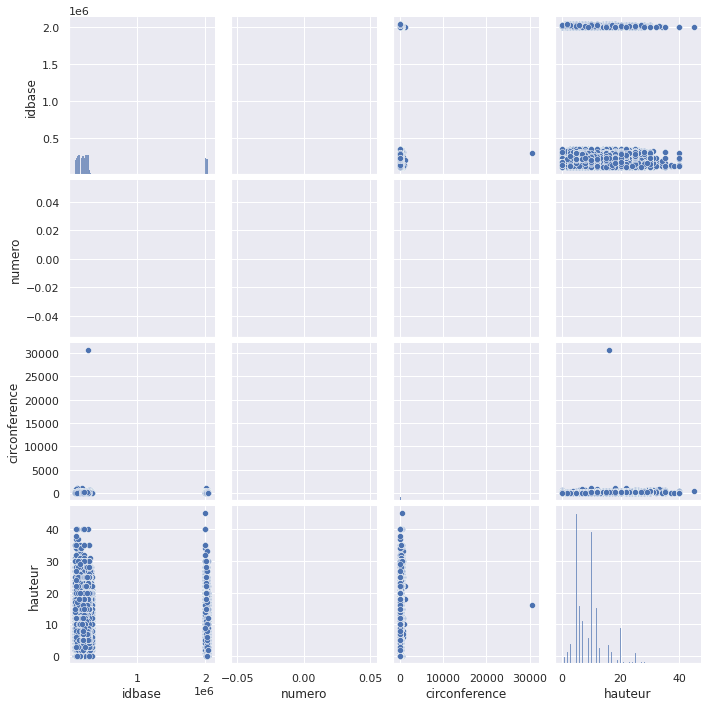

In [559]:
sns.pairplot(df)

Et calculer la matrice de correlation.

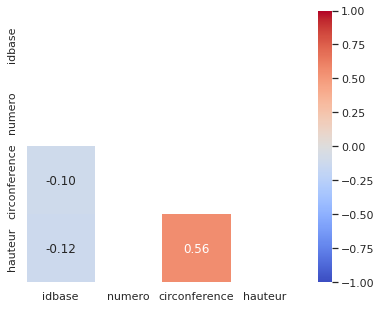

In [560]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)


# 3. Cleaning

Maintenant que nous connaissons un peu nos données, nous allons pouvoir faire un peu de cleaning.

## 3.1 Select platanes only

Tout d'abord, selectionnons uninquement les arbres de type platane.

In [561]:
tmp = df.libelle.value_counts()
tmp

Platane             42534
Marronnier          24884
Tilleul             21907
Erable              19019
Sophora             11618
                    ...  
Arbre aux perles        1
Idesia                  1
Noisetier fruit         1
Euscaphis               1
Seringas                1
Name: libelle, Length: 196, dtype: int64

In [562]:
tmp[tmp>100].head(30)

Platane                    42534
Marronnier                 24884
Tilleul                    21907
Erable                     19019
Sophora                    11618
Frêne                       4942
Pin                         4903
Micocoulier                 4549
Chêne                       4528
Cerisier à fleurs           4005
Poirier à fleurs            3751
Charme                      3421
Noisetier de Byzance        3351
Peuplier                    3230
Orme                        2254
Robinier                    2224
If                          2071
Bouleau                     2057
Hêtre                       1899
Fevier                      1736
Paulownia                   1350
Magnolia                    1274
Cyprès                      1216
Noyer                       1208
Pommier à fruits            1167
Faux-cyprès                 1133
Arbre de Judée              1119
Tulipier                    1052
Arbre aux quarante écus     1026
Frêne à fleurs              1014
Name: libe

In [563]:
df = df.loc[df.libelle == "Platane"]
df.libelle.value_counts()

Platane    42534
Name: libelle, dtype: int64

## 3.1 Drop NaN

Nous allons ensuite supprimer les colonnes ayant plus de 50% dfe valeurs manquantes.


ATTENTION : Cette opération est faites de manière arbitraire dans le cadre de ce travail, mais le traitement des valeurs manquantes est en général un sujet très important qu'il ne faut pas négliger.

Grace à la variable `tmp` on peut venir effectuer des filtres sur les colonnes.

In [564]:
tmp = df.isna().mean().sort_values(ascending=False)
tmp

numero            1.000000
variete           0.993958
complement        0.686745
stade             0.092091
remarquable       0.030893
espece            0.000094
idbase            0.000000
hauteur           0.000000
circonference     0.000000
libelle           0.000000
genre             0.000000
type              0.000000
idemplacement     0.000000
lieu              0.000000
arrondissement    0.000000
domanialite       0.000000
geo_point_2d      0.000000
dtype: float64

In [565]:
tmp[tmp>0.5]

numero        1.000000
variete       0.993958
complement    0.686745
dtype: float64

In [566]:
tmp[tmp>0.5].index

Index(['numero', 'variete', 'complement'], dtype='object')

In [567]:
cols = tmp[tmp>0.5].index
df.drop(columns=cols, inplace=True)
df

,idbase,type,domanialite,arrondissement,lieu,idemplacement,libelle,genre,espece,circonference,hauteur,stade,remarquable,geo_point_2d
3,245018,Arbre,Alignement,PARIS 16E ARRDT,BOULEVARD LANNES,000701008,Platane,Platanus,x hispanica,180,15,Adulte,NON,"48.86388335089906,2.269408781698171"
10,284539,Arbre,Alignement,PARIS 18E ARRDT,BOULEVARD NEY,001402003,Platane,Platanus,x hispanica,145,16,Adulte,NON,"48.89837840334469,2.349379924095419"
11,295348,Arbre,Alignement,PARIS 5E ARRDT,QUAI DE LA TOURNELLE,000602021,Platane,Platanus,x hispanica,70,12,Jeune (arbre)Adulte,NON,"48.851074139917436,2.3517112241372082"
17,220764,Arbre,Alignement,PARIS 13E ARRDT,BOULEVARD VINCENT AURIOL,001101006,Platane,Platanus,x hispanica,45,5,Jeune (arbre)Adulte,NON,"48.832468257467,2.360855065450094"
18,240302,Arbre,Alignement,PARIS 14E ARRDT,BOULEVARD BRUNE,000501003,Platane,Platanus,x hispanica,125,10,Jeune (arbre)Adulte,NON,"48.8275814560238,2.306488731332329"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205824,219070,Arbre,Alignement,PARIS 7E ARRDT,AVENUE DE SAXE,000103010,Platane,Platanus,x hispanica,45,8,Jeune (arbre),NON,"48.849955858313365,2.307611754116103"
205829,224942,Arbre,Alignement,PARIS 16E ARRDT,BOULEVARD DE L AMIRAL BRUIX,000202019,Platane,Platanus,x hispanica,115,15,Adulte,NON,"48.87569442820602,2.280308039630593"
205832,277196,Arbre,Alignement,PARIS 7E ARRDT,AVENUE EMILE POUVILLON,000402002,Platane,Platanus,occidentalis,180,25,Adulte,NON,"48.857501544418604,2.298694846390691"
205835,218657,Arbre,Alignement,BOIS DE BOULOGNE,AVENUE DE L HIPPODROME,000101008,Platane,Platanus,orientalis,161,16,Adulte,NON,"48.858427453525294,2.256386261184969"


## 3.2 Keep only numeric columns

Dans le cadre de ce travail, on va garder uniquement les colonnes numériques.

In [568]:
tmp = df.dtypes
tmp

idbase             int64
type              object
domanialite       object
arrondissement    object
lieu              object
idemplacement     object
libelle           object
genre             object
espece            object
circonference      int64
hauteur            int64
stade             object
remarquable       object
geo_point_2d      object
dtype: object

In [569]:
cols = ["circonference", "hauteur"]
df = df[cols]
df.head()

,circonference,hauteur
3,180,15
10,145,16
11,70,12
17,45,5
18,125,10


## 3.3 Handle outliers

Il faut également s'intéresser aux outliers. Regardons d'abord les données qui semblent aberrantes. 

In [570]:
df.describe()

,circonference,hauteur
count,42534.000000,42534.000000
mean,110.215569,12.649410
std,164.384905,6.188441
min,0.000000,0.000000
25%,55.000000,8.000000
50%,100.000000,12.000000
75%,155.000000,16.000000
max,30553.000000,45.000000


On voit que la valeur maximale de la colonne circonférence semble très élévée. Confirmons cela par des visualisations.

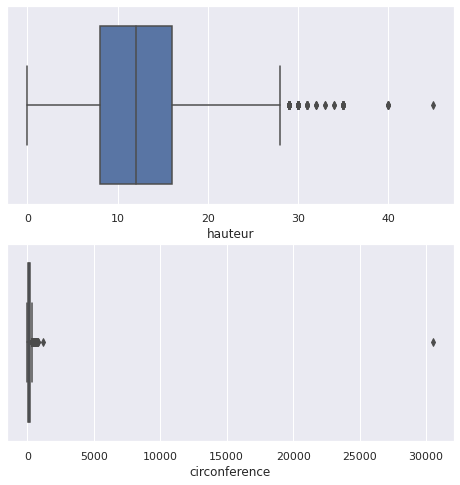

In [571]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
sns.boxplot(df.hauteur, ax=axs[0], orient="v")
sns.boxplot(df.circonference, ax=axs[1], orient="v")

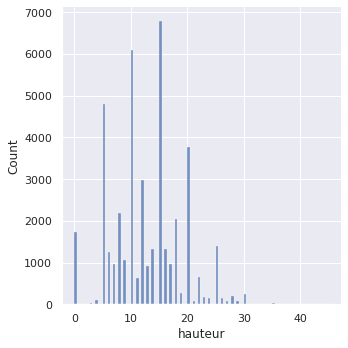

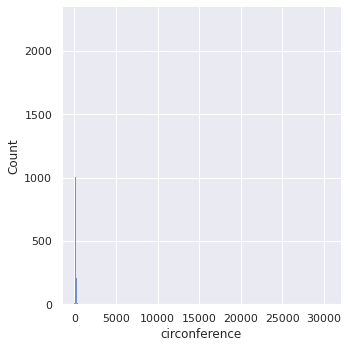

In [572]:
sns.displot(df.hauteur)
sns.displot(df.circonference)

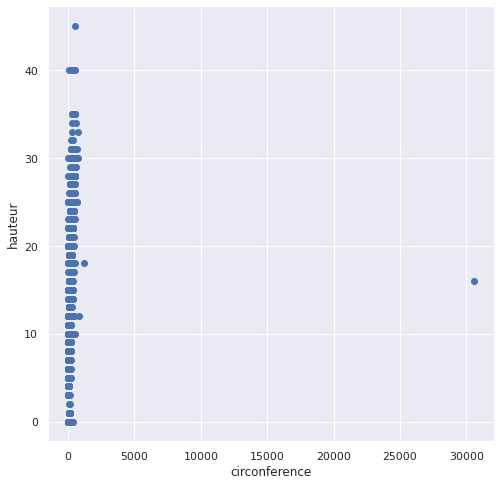

In [573]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df.circonference, df.hauteur)

Les choses semblent se confirmer. Commencons par supprimer les outliers les plus évidents. 

In [574]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.loc[df.hauteur<38]
df_cleaned = df_cleaned.loc[df.circonference<5000]
df_cleaned.describe()

,circonference,hauteur
count,42526.000000,42526.000000
mean,109.457673,12.644711
std,72.245853,6.178476
min,0.000000,0.000000
25%,55.000000,8.000000
50%,100.000000,12.000000
75%,155.000000,16.000000
max,1185.000000,35.000000


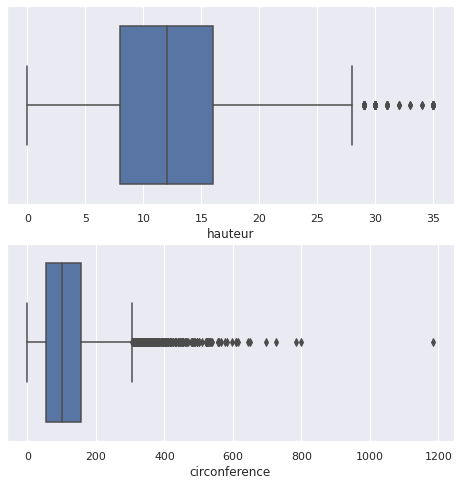

In [575]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_cleaned.hauteur, ax=axs[0], orient="v")
sns.boxplot(df_cleaned.circonference, ax=axs[1], orient="v")

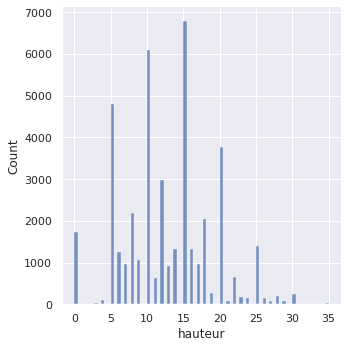

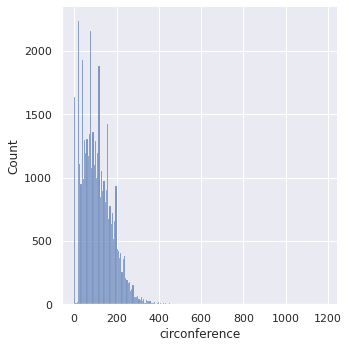

In [576]:
sns.displot(df_cleaned.hauteur)
sns.displot(df_cleaned.circonference)

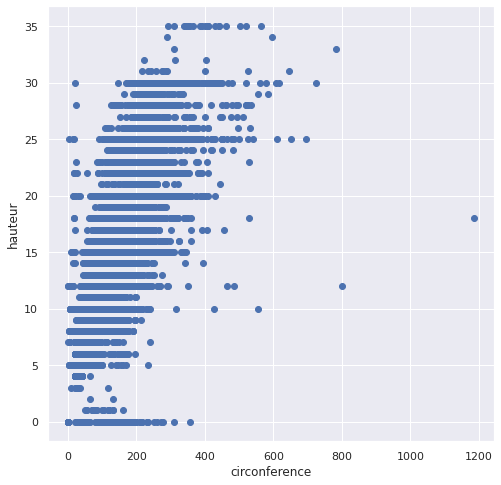

In [577]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)

Les donnéees semblent plus propres. C'est une bonne chose. En effet, dans le cadre d'une regression linéaire, le fait d'avoir des outliers dans nos données va réduire considérablement la performance de notre modélisation. 

Nous pouvons d'ailleurs pousser un peu plus notre nettoyage afin de supprimer les arbres ayant une hauteur à 0, un outlier dans la colonne circonférence etc.

ATTENTION : Comme la gestion des données manquantes, la gestion et le nettoyage des outliers est un sujet très important. Dans le cadre de ce travail nous passons rapidement sur le sujet, mais il est important d'être rigoureux dans le traitement des données aberrantes.

In [578]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.loc[df.hauteur>1]
df_cleaned = df_cleaned.loc[df.circonference>10]
df_cleaned = df_cleaned.loc[df.hauteur<38]
df_cleaned = df_cleaned.loc[df.circonference<800]
df_cleaned.describe()

,circonference,hauteur
count,40752.000000,40752.000000
mean,113.819616,13.186617
std,69.921268,5.718868
min,11.000000,2.000000
25%,60.000000,9.000000
50%,102.000000,13.000000
75%,156.000000,17.000000
max,784.000000,35.000000


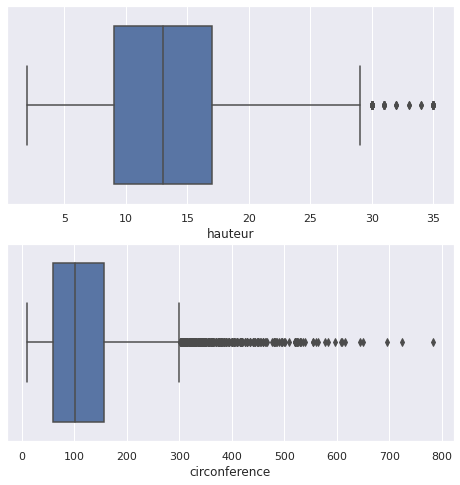

In [579]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_cleaned.hauteur, ax=axs[0], orient="v")
sns.boxplot(df_cleaned.circonference, ax=axs[1], orient="v")

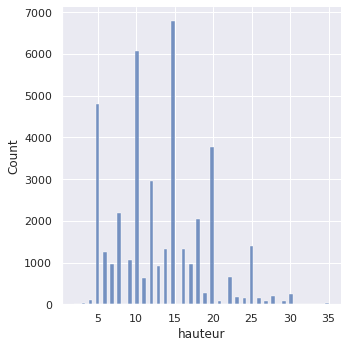

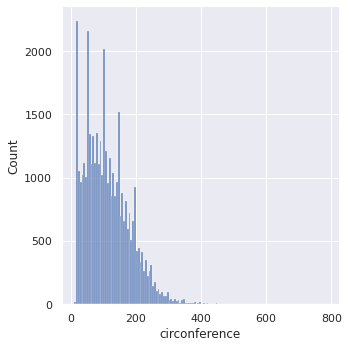

In [580]:
sns.displot(df_cleaned.hauteur)
sns.displot(df_cleaned.circonference)

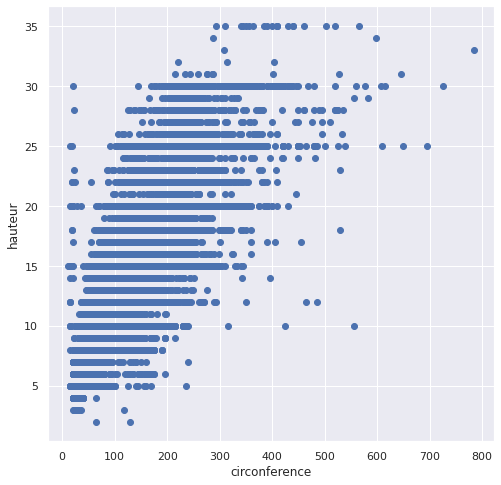

In [581]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)

# 4. Linear Regression

Nous avons des données nettoyées, nous allons enfin pouvoir nous plonger dans le vif du sujet : la Régression Linéaire.


Python possède 2 librairies pour le faire 
* scikit-learn
* statsmodels


Nous allons présenter les 2 dans le cadre de ce TP.

## 4.1 With scikit-learn

Jettons un oeuil à notre dataframe.

In [582]:
df_cleaned.head()

,circonference,hauteur
3,180,15
10,145,16
11,70,12
17,45,5
18,125,10


Séparons X et y.

In [583]:
y = df_cleaned.hauteur
X = df_cleaned.drop(columns="hauteur")

In [584]:
X.head()

,circonference
3,180
10,145
11,70
17,45
18,125


In [585]:
y.head()

3     15
10    16
11    12
17     5
18    10
Name: hauteur, dtype: int64

Nous pouvons instancier un modèle depuis le package `linear_regression`de scikit-learn.

In [586]:
lr = LinearRegression()

Maintenant, nous pouvons 'entraîner' notre modèle.

In [587]:
lr.fit(X, y)

LinearRegression()

Nous pouvons utiliser notre modèle pour faire des prédictions.

In [588]:
y_pred = lr.predict(X)
y_pred[:20]

array([17.77082684, 15.34643234, 10.15130129,  8.41959093, 13.96106406,
        7.03422265, 20.5415634 ,  6.68788058, 11.53666957, 17.77082684,
       14.6537482 , 12.78350102,  9.45861714,  7.03422265, 13.96106406,
       19.50253719, 12.22935371,  7.03422265,  8.765933  , 13.61472199])

Et nous pouvons calculer le r2 score de notre modèle de deux facons.

In [589]:
lr.score(X,y)

0.717247360106629

In [590]:
r2_score(y, y_pred)

0.717247360106629

Pour bien comprendre à quoi correspond ce score, nous pouvons le calculer "manuellement".

In [591]:
y_mean = y.mean()
y_mean

13.186616607773852

In [592]:
SCT = sum([(i - y_mean )**2 for i in y.values])
SCT

1332779.780697963

In [593]:
f = lambda i : (i - y_mean)**2

SCT = y.apply(f).sum()
SCT

1332779.7806978798

In [594]:
SCE =  sum([(i - y_mean)**2 for i in y_pred])

In [595]:
r2 = SCE/ SCT
r2

0.7172473601066943

Notre r2 est bien le même à chaque fois!

Parlons de nos "prédictions". Notre modèle permet de calculer y (la hauteur) en fonction de X (la circonférence).

C'est bien une équation de type `y = a.x + b`.

Nous pouvons retrouver facilement la valeur de `a`et de `b`.

In [596]:
a = lr.coef_
a

array([0.06926841])

Ici, `a` est en fait un objet de type `np.array`. En effet, dans notre cas, nous avons une seule colonne dans notre `X` (la colonne circonférence). 

Mais si nous avions plusieurs colonnes, il y aurait plusieurs coeficients. C'est ce qui explique que `a`soit en fait un `np.array`.

In [597]:
a = a[0]
a

0.06926841411196329

In [598]:
b = lr.intercept_
b

5.302512297717758

Définissons une fonction qui pour toute valeur de `x`nous calcule `y`.

In [599]:
def my_prediction(x) : 
    return (a* x) + b


Pour info, cette fonction peut aussi s'écrire comme cela : 

In [600]:
my_prediction = lambda x : (a* x) + b

Utilisons mainteant une compréhension de liste pour effectuer le calcul de tous les `y_pred`.

In [601]:
y_pred_2 = [my_prediction(x) for x in X.circonference.values]
y_pred_2[:10]

[17.770826837871148,
 15.346432343952435,
 10.151301285555189,
 8.419590932756106,
 13.961064061713168,
 7.03422265051684,
 20.54156340234968,
 6.687880579957024,
 11.536669567794455,
 17.770826837871148]

Nous avions `y_pred` proposé par la méthode `predict`de scikit-learn.

In [602]:
y_pred

array([17.77082684, 15.34643234, 10.15130129, ..., 17.77082684,
       16.45472697, 17.77082684])

Vérifions que les valeurs sont bien les mêmes : 

In [603]:
y_pred == y_pred_2

array([ True,  True,  True, ...,  True,  True,  True])

In [604]:
(y_pred == y_pred_2).all()

True

C'est confirmé!  La méthode `predict`de `scikit-learn` n'effectue qu'un simple calcul...

Amusons nous maintenant à afficher notre droite `y = a.x+b` sur notre nuage de points.

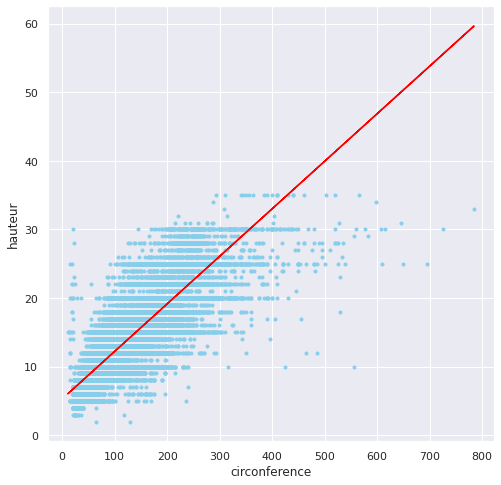

In [605]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")

_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur, c="skyblue", marker=".", alpha=1)
_ = ax.plot(df_cleaned.circonference, y_pred, c="red")

Nous pouvons également afficher `y`et `y_pred`sur le même graphique. Dans un monde idéal, `y_pred` est toujours égal à `y`, et les points sont alignés sur la droite `y=x`.


Affichons donc nos points et notre droite.

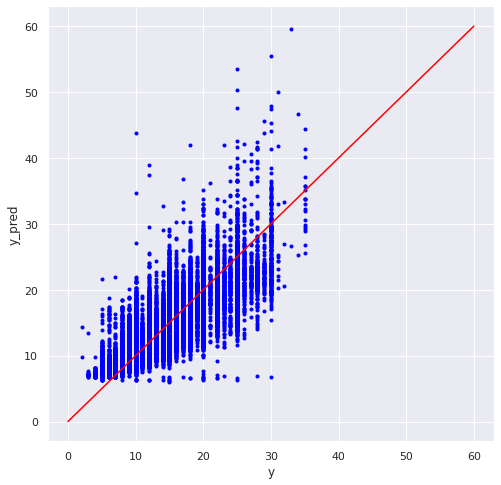

In [606]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("y")
ax.set_ylabel("y_pred")
_ = ax.scatter(y.values, y_pred, c="blue", marker=".", alpha=1)
_ = ax.plot([0, 60], [0, 60], c="red")

On voit que notre modèle n'est pas 'très bon'. Il capte la 'tendance' mais semble commettre beaucoup d'erreurs...

Ces erreurs, ou plutôt ces résidus, nous pouvons les calculer et les afficher sur un graphique.

In [607]:
residus = y_pred - y
residus.head()

3     2.770827
10   -0.653568
11   -1.848699
17    3.419591
18    3.961064
Name: hauteur, dtype: float64

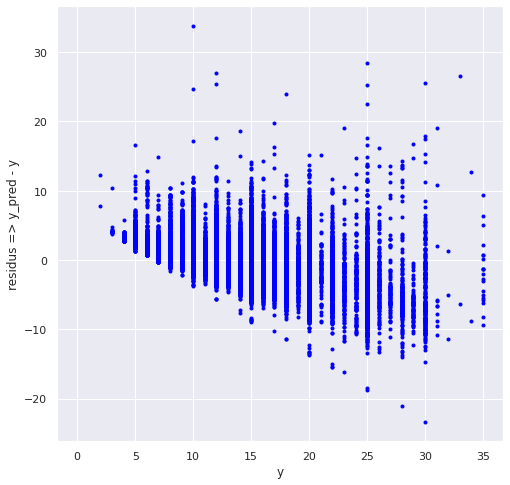

In [608]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("y")
ax.set_ylabel("residus => y_pred - y")
_ = ax.scatter(y.values, residus.values, c="blue", marker=".", alpha=1)
_ = ax.plot([0, 0], [0, 0], c="red")

On semble détecter une sorte de "patern" : plus la valeur de y est ellevée, plus les erreurs semblent importantes. 

Mettons cette idée de côté pour l'instant et continuons l'analyse des résidus.

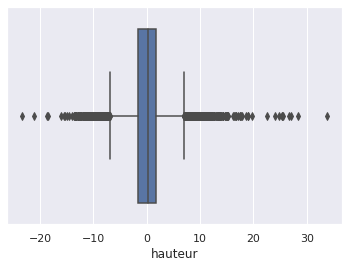

In [609]:
sns.boxplot(residus)

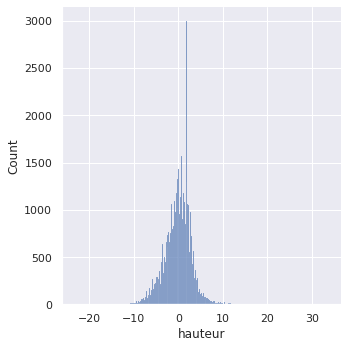

In [610]:
sns.displot(residus)

In [611]:
residus.describe().round(2)

count    40752.00
mean         0.00
std          3.04
min        -23.31
25%         -1.73
50%          0.27
75%          1.77
max         33.75
Name: hauteur, dtype: float64

On voit que de facon "globale" les résidus sont centrés autour de 0. C'est une bonne chose !

En revanche on observe une grande variance de ces résidus et c'est un sujet sur lequel nous reviendrons plus tard dans le cours.

## 4.2 With StatsModels (1/3)

StatsModels ne fonctionne pas exactement comme scikit-learn.

* Première chose, la regression lineaire dans StatsModels est regroupé derrière le terme OLS (Ordinary Least Square, ou méthode des moindres carrés).


* Deuxième chose, On peut utiliser StatsModels de 2 façons différentes :  `import statsmodels.api as sm` ou 
 `from statsmodels.formula.api import ols`. Ces deux méthodes ne sont pas fondamentallement différentes mais il y a un petit détail qui change tout. Nous verrons cela dans la suite du notebook.


Intéressons nous à la méthode `ols`sur package `formula.api`.

In [612]:
model = ols("hauteur ~ circonference", data=df_cleaned)

In [613]:
model = model.fit()

On peut regrouper les 2 lignes en 1 seule.

In [614]:
model = ols("hauteur ~ circonference", data=df_cleaned).fit()

Chose que ne fait pas scikit-learn, StatsModels nous propose une sorte de 'rapport' complet grace à la méthode `summary`.

In [615]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                hauteur   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:39:24   Log-Likelihood:            -1.0315e+05
No. Observations:               40752   AIC:                         2.063e+05
Df Residuals:                   40750   BIC:                         2.063e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.3025      0.029    184.246

Entre autres informations on peut y lire le `r2_score`, ainsi que les différents coefficients. On peut également les imprimmer independament les un des autres.

In [616]:
print("Parameters: ", model.params)


Parameters:  Intercept        5.302512
circonference    0.069268
dtype: float64


In [617]:
print("R2: ", model.rsquared)

R2:  0.7172473601066287


Magie des magies, le `r2_score` et nos coefficients sont les mêmes ! 

In [618]:
a

0.06926841411196329

In [619]:
b

5.302512297717758

Nos valeurs prédites aussi...

In [620]:
model.predict()

array([17.77082684, 15.34643234, 10.15130129, ..., 17.77082684,
       16.45472697, 17.77082684])

In [621]:
y_pred

array([17.77082684, 15.34643234, 10.15130129, ..., 17.77082684,
       16.45472697, 17.77082684])

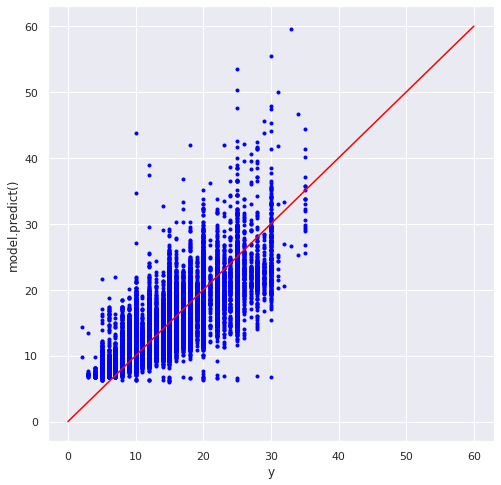

In [622]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("y")
ax.set_ylabel("model.predict()")
_ = ax.scatter(y.values, y_pred, c="blue", marker=".", alpha=1)
_ = ax.plot([0, 60], [0, 60], c="red")

## 4.3 With StatsModels (2/3)

Intéressons nous maintenant à l'autre méthode : `import statsmodels.api as sm`.

In [623]:
model = sm.OLS(y, X)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                hauteur   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          4.559e+05
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:39:25   Log-Likelihood:                     -1.1550e+05
No. Observations:               40752   AIC:                                  2.310e+05
Df Residuals:                   40751   BIC:                                  2.310e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Tiens... le `r2_score` est de 0.91, et le `b`de `y = a.x + b`, aussi appelé `ìntercept` n'existe plus...

In [624]:
print("Parameters: ", model.params)
print("R2: ", model.rsquared)

Parameters:  circonference    0.103091
dtype: float64
R2:  0.9179503262582753


Nos prédictions sont donc différentes ? 

In [625]:
model.predict()[:10]

array([18.55645577, 14.94825604,  7.21639947,  4.63911394, 12.88642762,
        2.57728552, 22.68011261,  2.06182842,  9.27822788, 18.55645577])

In [626]:
y_strange = model.predict()

In [627]:
y_pred[:10]

array([17.77082684, 15.34643234, 10.15130129,  8.41959093, 13.96106406,
        7.03422265, 20.5415634 ,  6.68788058, 11.53666957, 17.77082684])

In [628]:
y[:10].values

array([15, 16, 12,  5, 10,  5, 25,  5, 16, 20])

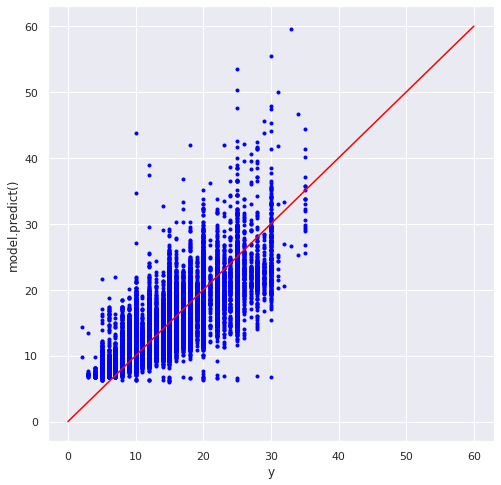

In [629]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("y")
ax.set_ylabel("model.predict()")
_ = ax.scatter(y.values, y_pred, c="blue", marker=".", alpha=1)
_ = ax.plot([0, 60], [0, 60], c="red")

Avant de comprendre pourquoi notre `r2_score` est monté en flèche, et pourquoi il est dit `uncentered`, regardons d'abord comment on peut avec le module `sm`, obtenir le même fonctionnement que le module `ols` du package `formula.api`.

## 4.4 With StatsModels (3/3)

Il faut en fait rajouter une colonne 'artificielle' qui ne comporte q'une seule valeur. De la sorte, StatsModels va calculer un coefficient pour cette colonne et nous donner notre `b`.


La valeur de cette colonne ne peut pas être 0, je vous laisse deviner pourquoi! En général on la fixe à 1.

In [630]:
X

,circonference
3,180
10,145
11,70
17,45
18,125
...,...
205824,45
205829,115
205832,180
205835,161


In [631]:
X["intercept"] = 1
X.head()

,circonference,intercept
3,180,1
10,145,1
11,70,1
17,45,1
18,125,1


In [632]:
model = sm.OLS(y, X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                hauteur   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:39:25   Log-Likelihood:            -1.0315e+05
No. Observations:               40752   AIC:                         2.063e+05
Df Residuals:                   40750   BIC:                         2.063e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
circonference     0.0693      0.000    321.510

In [633]:
print("Parameters: ", model.params)
print("R2: ", model.rsquared)

Parameters:  circonference    0.069268
intercept        5.302512
dtype: float64
R2:  0.7172473601066287


C'est bon, nous avons retrouvé le modèle que nous connaissions!

Mais alors... a quoi correspond le `r2_score` qui était 'trop' élevé?

Et bien tout simplement car dans le cas ou il n'y a pas de intercept, le `r2_score` n'est pas exactement le vrai `r2_score`.



On peut le démontrer facilement : 

In [634]:
r2_score(y, y_strange)

0.4817016223683078

In [635]:
b

5.302512297717758

Cela n'aura pas de grandes répercussions sur la suite de ce cours, mais retenez bien deux choses :
* Faites attention au module que vous utilisez si vous faites une regression avec StatsModels.
* Si un score apparait "trop" élevé, il vaut mieux être prudent. 


In [636]:
y_pred

array([17.77082684, 15.34643234, 10.15130129, ..., 17.77082684,
       16.45472697, 17.77082684])



Pour les plus curieux, voici un [lien](https://stats.stackexchange.com/questions/36064/calculating-r-squared-coefficient-of-determination-with-centered-vs-un-center) qui donne plus d'informations sur le sujet.

In [637]:
model.predict()

array([17.77082684, 15.34643234, 10.15130129, ..., 17.77082684,
       16.45472697, 17.77082684])